In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv(r"C:\Users\SWAROOP\Desktop\diabetes_prediction.csv")
X = data[['Age', 'BMI', 'BloodPressure', 'GlucoseLevel']]
y = data['Diabetes']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
# Predictions
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)[:, 1]

In [9]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.46
              precision    recall  f1-score   support

           0       0.51      0.35      0.41        55
           1       0.43      0.60      0.50        45

    accuracy                           0.46       100
   macro avg       0.47      0.47      0.46       100
weighted avg       0.48      0.46      0.45       100



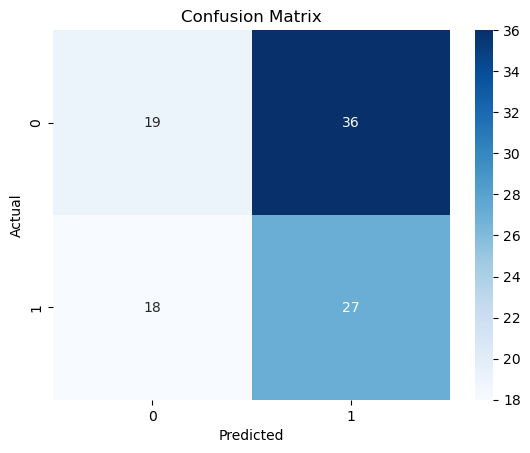

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


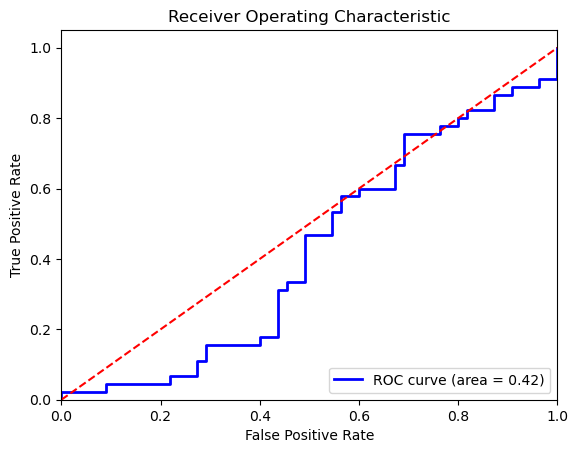

In [13]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
# Predicting new samples
new_data = pd.DataFrame({
    'Age': [35, 50],
    'BMI': [26.0, 29.5],
    'BloodPressure': [128, 140],
    'GlucoseLevel': [110, 180]
})
new_data = scaler.transform(new_data)
new_predictions = model.predict(new_data)
print("\nPredictions on new data:", new_predictions)


Predictions on new data: [0 0]
